# Surface Data and Plotting
This notebook demonstrates reading surface data and plotting it using MetPy's declarative syntax.

In [2]:
from datetime import datetime, timedelta

from metpy.io import metar
from metpy.plots import declarative
from metpy.units import units
import pandas as pd

### Read Data

We bring in surface data that is in METAR format and store it for approximately two weeks in `/data/ldmdata/surface/sao` and the format of the filenames are `YYYYMMDDHH_sao.wmo` where `YYYY` is the year, `MM` is the month, `DD` is the day, and `HH` is the hour. Or there are pre-decoded files located in `/data/ldmdata/surface/csv` and can be read in using the Pandas module.

In [2]:
date = datetime(2015, 5, 1, 0)

# Read with pandas, note differences from METAR files
df = pd.read_csv(f'http://bergeron.valpo.edu/archive_surface_data/{date:%Y}/{date:%Y%m%d}_metar.csv',
                 parse_dates=['date_time'], na_values=[-9999])
#df.skyc = df.skyc.astype('int')

/anaconda/envs/main/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.date_time

0        2015-05-30 23:53:00
1        2015-05-30 23:35:00
2        2015-05-30 23:30:00
3        2015-05-30 23:30:00
4        2015-05-30 23:35:00
                 ...        
188155   2015-05-01 23:29:00
188156   2015-05-01 23:00:00
188157   2015-05-01 23:00:00
188158   2015-05-01 23:00:00
188159   2015-05-01 23:00:00
Name: date_time, Length: 188160, dtype: datetime64[ns]

### What data is in the file?

Use some common Python to see what variables could be plotted. This is done by listing the `keys` that are present in the dataset `df`.

In [4]:
list(df.keys())

['station_id',
 'latitude',
 'longitude',
 'elevation',
 'date_time',
 'wind_direction',
 'wind_speed',
 'current_wx1',
 'current_wx2',
 'current_wx3',
 'low_cloud_type',
 'low_cloud_level',
 'medium_cloud_type',
 'medium_cloud_level',
 'high_cloud_type',
 'high_cloud_level',
 'highest_cloud_type',
 'highest_cloud_level',
 'cloud_coverage',
 'air_temperature',
 'dew_point_temperature',
 'altimeter',
 'present_weather',
 'past_weather',
 'past_weather2',
 'air_pressure_at_sea_level',
 'eastward_wind',
 'northward_wind',
 'index']

Additionally, we can determine what the units are of the various variables by inspecting the dataframe for its `units`, if we have a METAR file.

In [ ]:
df

In [ ]:
df.date_time

In [ ]:
df.cloud_coverage

In [5]:
df.air_temperature

0         30.0
1         13.0
2         14.0
3          1.0
4         22.0
          ... 
188155     3.0
188156     NaN
188157     2.0
188158    18.0
188159    23.0
Name: air_temperature, Length: 188160, dtype: float64

### Plot Data

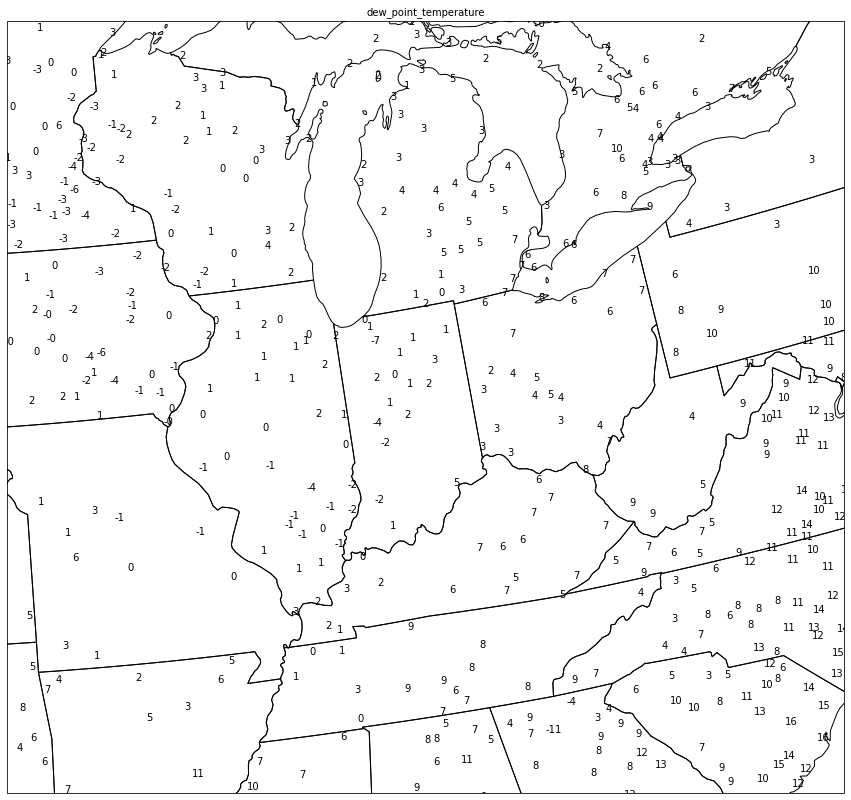

In [9]:
# Plot desired data
obs = declarative.PlotObs()
obs.data = df
obs.time = date
obs.time_window = timedelta(minutes=15)
obs.level = None
obs.fields = ['dew_point_temperature']

# Panel for plot with Map features
panel = declarative.MapPanel()
panel.layout = (1, 1, 1)
panel.projection = 'lcc'
panel.area = 'in'
panel.layers = ['states']
panel.plots = [obs]

# Bringing it all together
pc = declarative.PanelContainer()
pc.size = (15, 15)
pc.panels = [panel]

pc.show()

### Plotting Temperature in Fahrenheit

* Need to convert temperature from Celisus (standard for METAR) to Fahrenheit (standard U.S. surface plotting)

We can use the units module from MetPy to do a quick conversion and store the result in our dataframe (df) to use for plotting purposes.

To store a new variable in the dataframe we use the following format:

`df['variablename'] = new_variable`

In [10]:
df['tmpf'] = (df.air_temperature.values * units.degC).to('degF')

In [13]:
df['dptf'] = (df.dew_point_temperature.values * units.degC).to('degF')

### Plot the new variable

In [1]:
# Plot desired data
obs = declarative.PlotObs()
obs.data = df
obs.time = date
obs.time_window = timedelta(minutes=15)
obs.level = None
obs.fields = ['tmpf']

# Panel for plot with Map features
panel = declarative.MapPanel()
panel.layout = (1, 1, 1)
panel.projection = 'lcc'
panel.area = 'bc'
panel.layers = ['states']
panel.plots = [obs]

# Bringing it all together
pc = declarative.PanelContainer()
pc.size = (15, 15)
pc.panels = [panel]

pc.show()

NameError: name 'declarative' is not defined